# Network Traffic Analysis *Project*

In class we have covered binary classification (e.g., spam v. ham, fake v. real etc.). In this assignment, you will perform multi-class classification using the network traffic data.

We want you to do this in two ways:

**Direct Multi-Class Classification [KNN [Done], DT [Done], NN, etc]**

Directly use our previous methods for binary classification (Decision Trees, KNN, Perceptron, Neural Networks) to predict multiple classes.

**Direct Multi-Class Classification with Resampling [Done]**

Resample the large, unbalanced dataset to have a smaller and more balanced dataset for classifier

**Today: Hierarchical Multi-Class Classification**

Perform binary classification first (benign vs. malicious). Once a sample has been identified as malicious, perform multi-class classification to identify what kind of malicious activity is occurring.


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


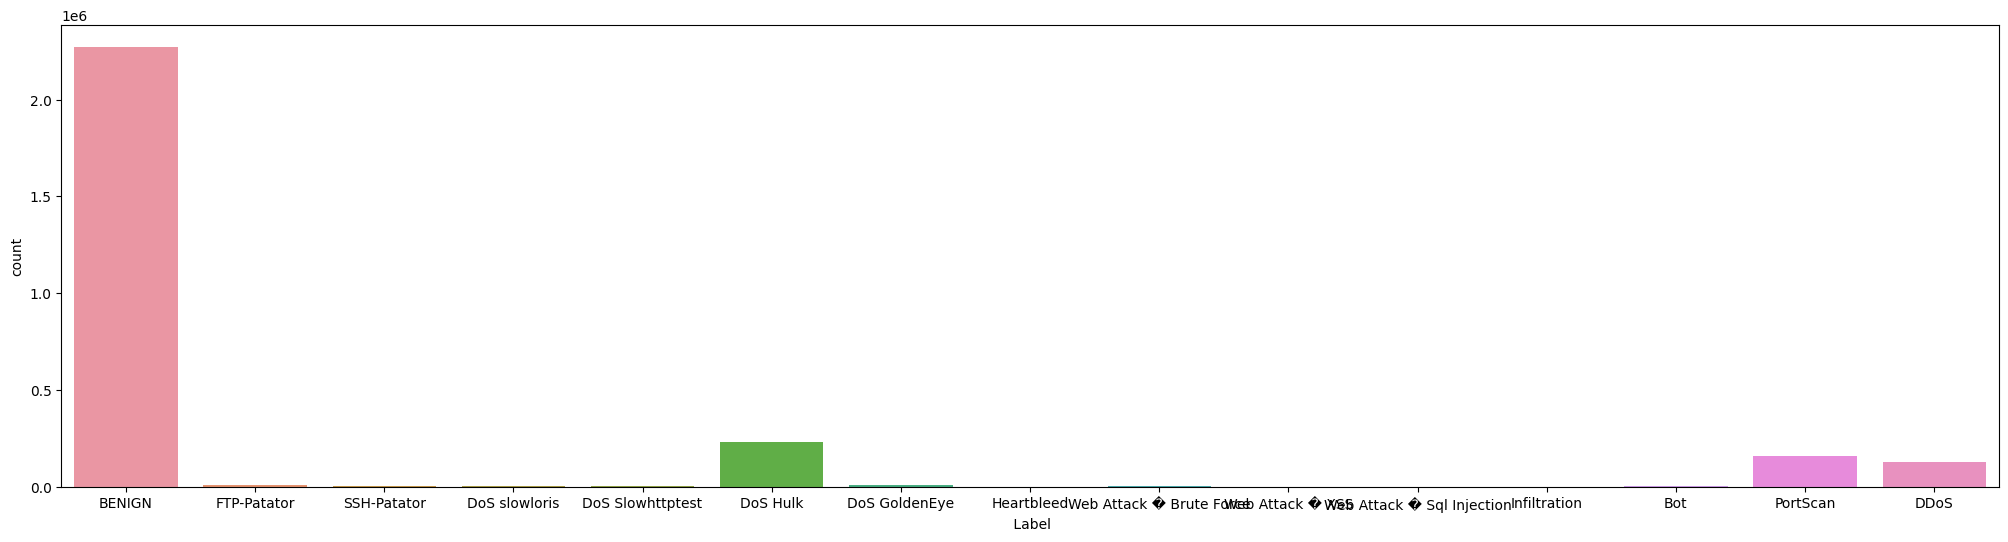

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

folder_path = '/content/drive/MyDrive/CS345/Wed_Oct_11/NetworkTraffic/MachineLearningCVE/'
df = pd.read_csv(folder_path + 'clean_traffic_data.csv')
fig = plt.figure(figsize=(25,6))
sns.countplot(x=' Label', data=df)
plt.show()

## Hierarchical Multi-Class Classification

In [ ]:
# for a more accurate testing,
# we need to extract original training and testing data before changing the dataset,
# making sure train/test set contains all the categories
import pandas as pd
import numpy as np
np.random.seed = 1 # make sure your generate the same random values when using np.random

label_set = set(df[' Label'])
# print(label_set)

df_train_list=[]
df_test_list=[]
print('-'*60)
for label in label_set:
  mask = np.random.rand(len(df[df[' Label']== label])) < 0.8
  print('num of "{}" data samples: {}'.format(label, len(mask)))
  df_train_list.append(df[df[' Label']== label][mask])
  df_test_list.append(df[df[' Label']== label][~mask])

df_train = pd.concat(df_train_list)
df_test = pd.concat(df_test_list)

df_train.to_csv(folder_path + 'train_traffic_data.csv', index=False)
df_test.to_csv(folder_path + 'test_traffic_data.csv', index=False)
# check if testing set contains all the categories
print('-'*60)
print('check if testing set contains all the categories:', set(df_train[' Label']) == set(df_test[' Label']))
# print(len(df) == (len(df_train) + len(df_test)))
print('-'*60)
for label in label_set:
  print('num of "{}" training samples: {}'.format(label, len(df_train[df_train[' Label']== label])))
  # print('-'*30)
  print('num of "{}" testing samples: {}'.format(label, len(df_test[df_test[' Label']== label])))


------------------------------------------------------------
num of "DDoS" data samples: 128027
num of "BENIGN" data samples: 2273097
num of "DoS Slowhttptest" data samples: 5499
num of "Bot" data samples: 1966
num of "Web Attack � Sql Injection" data samples: 21
num of "Heartbleed" data samples: 11
num of "Web Attack � Brute Force" data samples: 1507
num of "Web Attack � XSS" data samples: 652
num of "DoS slowloris" data samples: 5796
num of "DoS GoldenEye" data samples: 10293
num of "Infiltration" data samples: 36
num of "PortScan" data samples: 158930
num of "DoS Hulk" data samples: 231073
num of "SSH-Patator" data samples: 5897
num of "FTP-Patator" data samples: 7938
------------------------------------------------------------
check if testing set contains all the categories: True
------------------------------------------------------------
num of "DDoS" training samples: 102618
num of "DDoS" testing samples: 25409
num of "BENIGN" training samples: 1818388
num of "BENIGN" testing s

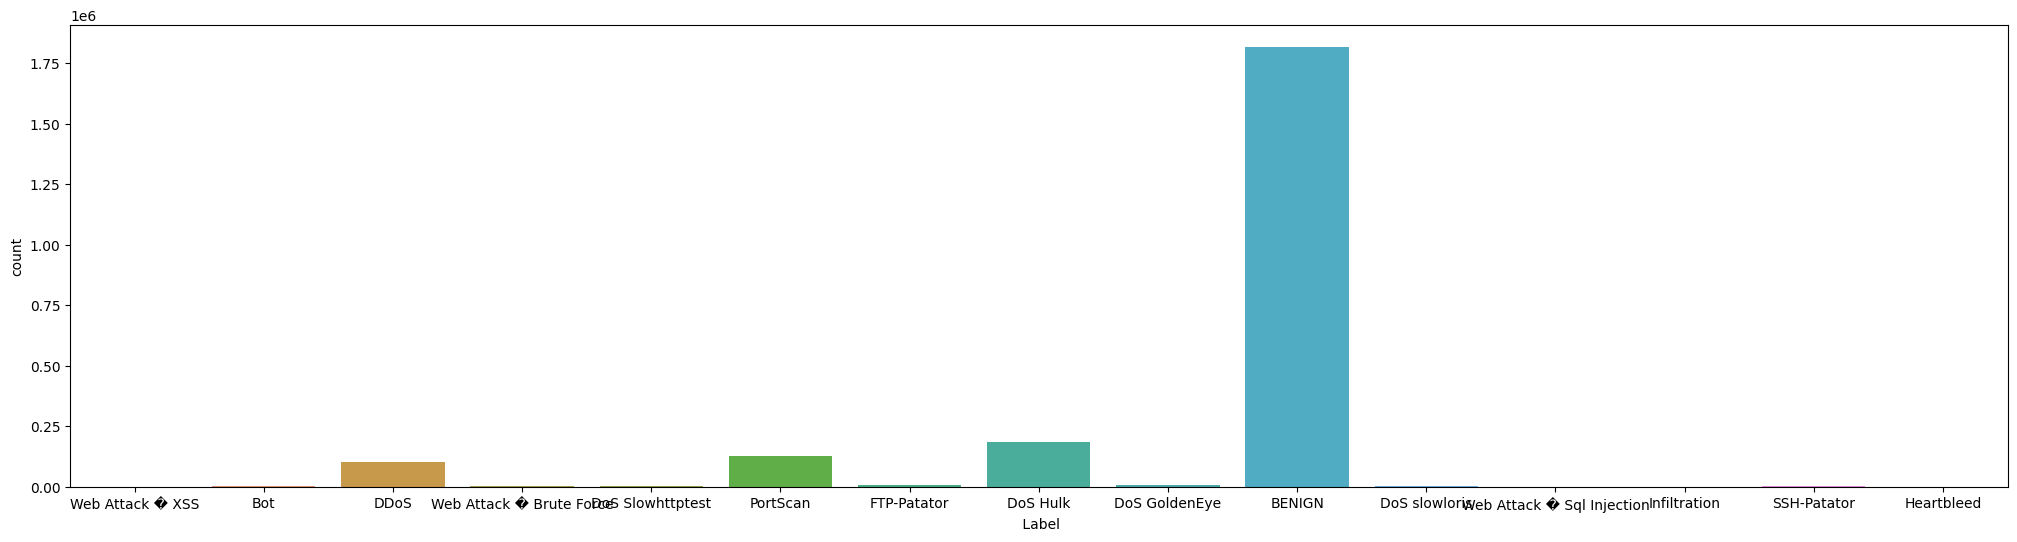

In [ ]:
fig = plt.figure(figsize=(25,6))
sns.countplot(x=' Label', data=df_train)
plt.show()

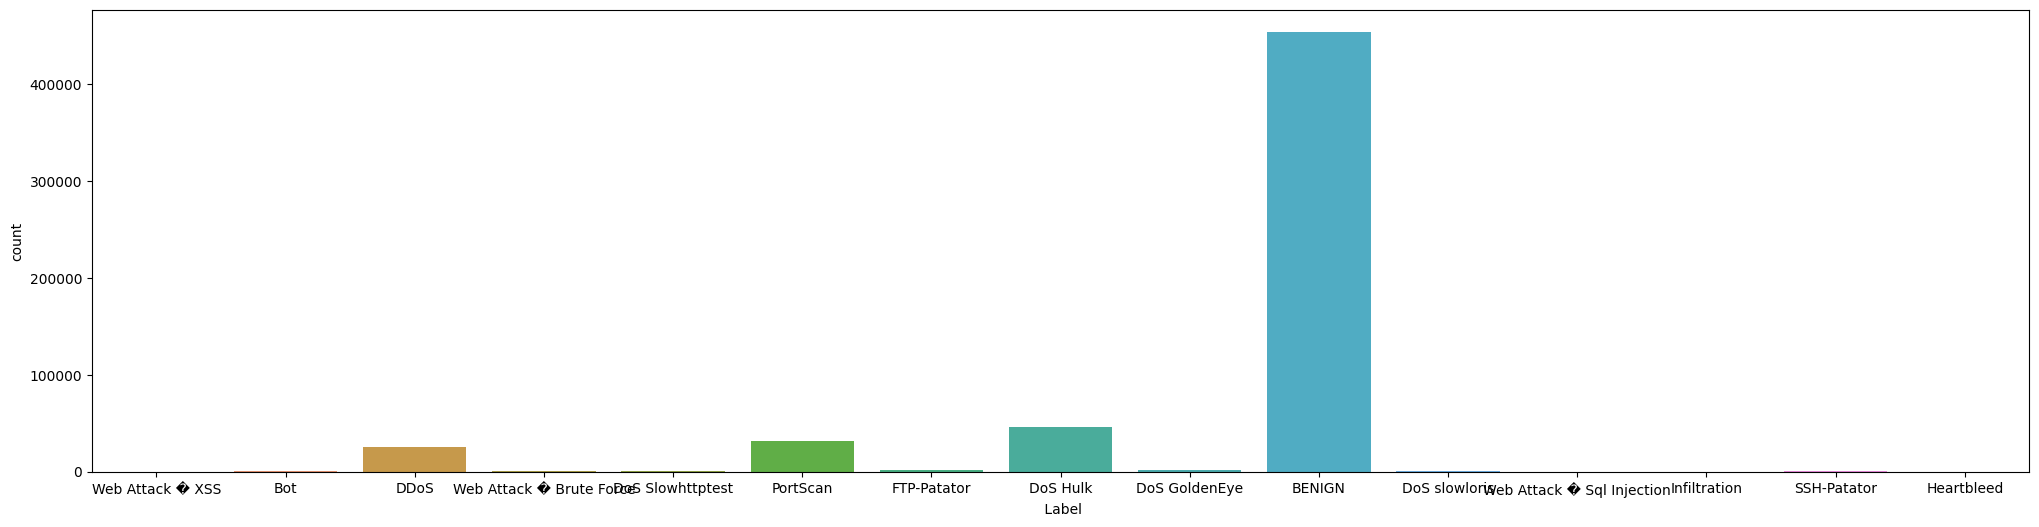

In [ ]:
fig = plt.figure(figsize=(25,6))
sns.countplot(x=' Label', data=df_test)
plt.show()

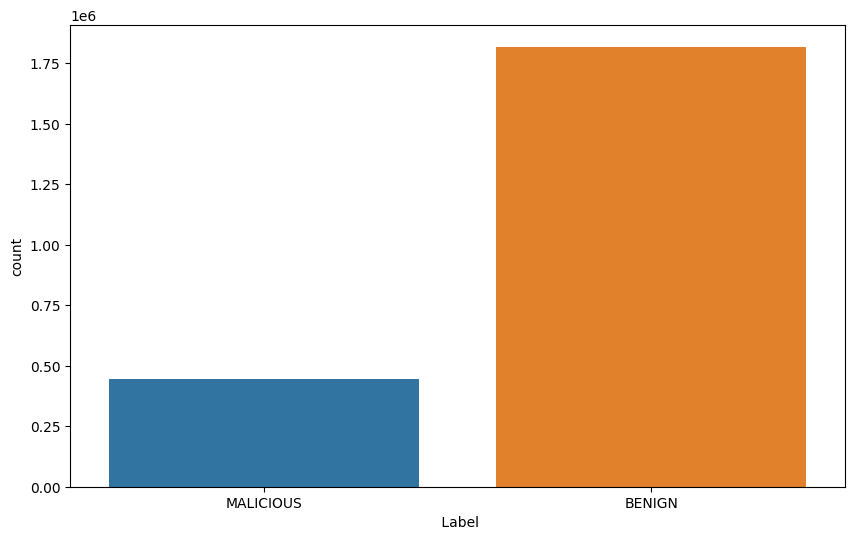

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 0. make a copy
df_binary = df_train.copy() # this is a deep copy
# 1. convert all malicious labels to "MALICIOUS"
df_binary.loc[df_binary[' Label'] != 'BENIGN', ' Label'] = 'MALICIOUS'

# 2. save the data
# folder_path = '/content/drive/MyDrive/CS345/Wed_Oct_11/NetworkTraffic/MachineLearningCVE/'
# df_binary.to_csv(folder_path + 'binary_traffic_data.csv')
# plot
fig = plt.figure(figsize=(10,6))
sns.countplot(x=' Label', data=df_binary)
plt.show()

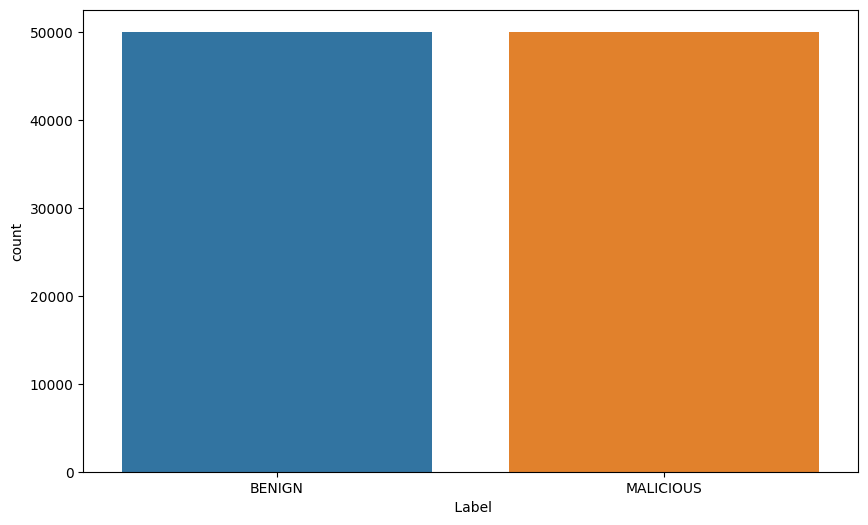

In [ ]:
# reduce and balance the binary dataset using resampling
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

rus = RandomUnderSampler(sampling_strategy={'BENIGN': 50000, 'MALICIOUS': 50000}, random_state=1)
X = df_binary[df_binary.columns[:-1]]
y = df_binary[df_binary.columns[-1]]
X_resampled, y_resampled = rus.fit_resample(X, y)

resampled_df_binary = pd.DataFrame(columns = df_binary.columns)

resampled_df_binary[resampled_df_binary.columns[:-1]] = X_resampled
resampled_df_binary[resampled_df_binary.columns[-1]] = y_resampled

# save into a csv file
# resampled_df.to_csv(folder_path + 'resampled_clean_traffic_data.csv', index = False)

fig = plt.figure(figsize=(10,6))
sns.countplot(x=' Label', data=resampled_df_binary)
plt.show()

## 1st layer of training: classify BENIGN and MALICIOUS activities

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import SGDClassifier
# from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# split the data into validation and training set:
# validation set has the same data distribution with training set
# while testing set not neccessarily has the same distribution.
mask = np.random.rand(len(resampled_df_binary)) < 0.9

train_set = resampled_df_binary[mask]
val_set = resampled_df_binary[~mask]

X_train = train_set[train_set.columns[:-1]]
y_train = train_set[train_set.columns[-1]]

X_val = val_set[val_set.columns[:-1]]
y_val = val_set[val_set.columns[-1]]

df_test_binary = df_test.copy()
df_test_binary.loc[df_test_binary[' Label'] != 'BENIGN', ' Label'] = 'MALICIOUS'

X_test = df_test_binary[df_test_binary.columns[:-1]]
y_test = df_test_binary[df_test_binary.columns[-1]]

# training
mlp = MLPClassifier(hidden_layer_sizes=(40,), random_state=1, max_iter=300).fit(X_train, y_train)

# prediction
pred = mlp.predict(X_test)
acc = accuracy_score(pred, y_test)
print('Validation Accuracy : {:.5f}'.format(accuracy_score(mlp.predict(X_val), y_val)))
print('Test Accuracy : {:.5f}'.format(acc))
print('Classification_report:')
print(classification_report(y_test, pred))

NameError: ignored

In [ ]:
# ensemble methods:
# Ensemble methods combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.
# Two very famous examples of ensemble methods are gradient-boosted trees and random forests.
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
# training
rfc = RandomForestClassifier().fit(X_train, y_train)

# prediction
pred = rfc.predict(X_test)
acc = accuracy_score(pred, y_test)
print('Test Accuracy : {:.5f}'.format(acc))
print('Classification_report:')
print(classification_report(y_test, pred))
plt.show()

Test Accuracy : 0.99848
Classification_report:
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00    454013
   MALICIOUS       1.00      1.00      1.00    111655

    accuracy                           1.00    565668
   macro avg       1.00      1.00      1.00    565668
weighted avg       1.00      1.00      1.00    565668



In [ ]:
# training
abc = AdaBoostClassifier().fit(X_train, y_train)

# prediction
pred = abc.predict(X_test)
acc = accuracy_score(pred, y_test)
print('Test Accuracy : {:.5f}'.format(acc))
print('Classification_report:')
print(classification_report(y_test, pred))

Test Accuracy : 0.98832
Classification_report:
              precision    recall  f1-score   support

      BENIGN       1.00      0.99      0.99    454013
   MALICIOUS       0.95      0.99      0.97    111655

    accuracy                           0.99    565668
   macro avg       0.97      0.99      0.98    565668
weighted avg       0.99      0.99      0.99    565668



In [ ]:
# training
etc = ExtraTreesClassifier().fit(X_train, y_train)

# prediction
pred = etc.predict(X_test)
acc = accuracy_score(pred, y_test)
print('Test Accuracy : {:.5f}'.format(acc))
print('Classification_report:')
print(classification_report(y_test, pred))

Test Accuracy : 0.99753
Classification_report:
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00    454013
   MALICIOUS       0.99      1.00      0.99    111655

    accuracy                           1.00    565668
   macro avg       1.00      1.00      1.00    565668
weighted avg       1.00      1.00      1.00    565668



In [ ]:
# Linear Classification
from sklearn.linear_model import SGDClassifier

# training
sc = SGDClassifier().fit(X_train, y_train)

# prediction
pred = sc.predict(X_test)
acc = accuracy_score(pred, y_test)
print('Test Accuracy : {:.5f}'.format(acc))
print('Classification_report:')
print(classification_report(y_test, pred))

Test Accuracy : 0.86158
Classification_report:
              precision    recall  f1-score   support

      BENIGN       0.96      0.86      0.91    454013
   MALICIOUS       0.60      0.86      0.71    111655

    accuracy                           0.86    565668
   macro avg       0.78      0.86      0.81    565668
weighted avg       0.89      0.86      0.87    565668



In [ ]:
# naive bayes: https://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import GaussianNB
# training
nb = GaussianNB().fit(X_train, y_train)

# prediction
pred = nb.predict(X_test)
acc = accuracy_score(pred, y_test)
print('Test Accuracy : {:.5f}'.format(acc))
print('Classification_report:')
print(classification_report(y_test, pred))

Test Accuracy : 0.32508
Classification_report:
              precision    recall  f1-score   support

      BENIGN       0.96      0.17      0.28    454013
   MALICIOUS       0.22      0.97      0.36    111655

    accuracy                           0.33    565668
   macro avg       0.59      0.57      0.32    565668
weighted avg       0.82      0.33      0.30    565668



## 2nd layer of Training: Classify different types of malicious activities

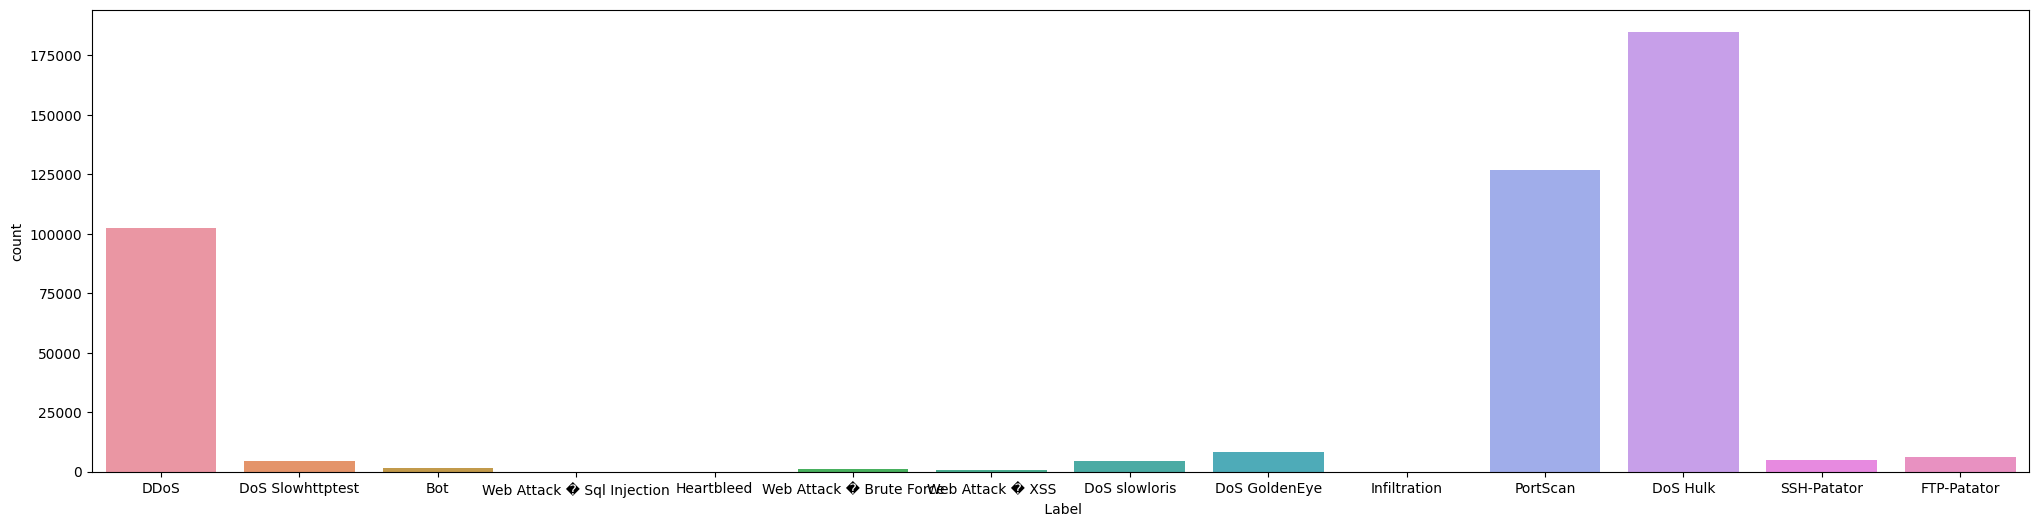

In [ ]:
# extract malicious activities from original data
df_malicious_train = df_train[df_train[' Label'] != 'BENIGN'].copy()
df_malicious_test = df_test[df_test[' Label'] != 'BENIGN'].copy()

fig = plt.figure(figsize=(25,6))
sns.countplot(x=' Label', data=df_malicious_train)
plt.show()

# print(len(df_malicious_train))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier

X_train = df_malicious_train[df_malicious_train.columns[:-1]]
y_train = df_malicious_train[df_malicious_train.columns[-1]]

X_test = df_malicious_test[df_malicious_test.columns[:-1]]
y_test = df_malicious_test[df_malicious_test.columns[-1]]

# training
rfc = RandomForestClassifier().fit(X_train, y_train)

# prediction
pred = rfc.predict(X_test)
acc = accuracy_score(pred, y_test)
print('Test Accuracy : {:.5f}'.format(acc))
print('Classification_report:')
print(classification_report(y_test, pred))
plt.show()

Test Accuracy : 0.99849
Classification_report:
                            precision    recall  f1-score   support

                       Bot       1.00      1.00      1.00       414
                      DDoS       1.00      1.00      1.00     25351
             DoS GoldenEye       1.00      1.00      1.00      1990
                  DoS Hulk       1.00      1.00      1.00     46011
          DoS Slowhttptest       1.00      0.99      1.00      1114
             DoS slowloris       1.00      1.00      1.00      1106
               FTP-Patator       1.00      1.00      1.00      1510
                Heartbleed       1.00      1.00      1.00         2
              Infiltration       1.00      0.62      0.77         8
                  PortScan       1.00      1.00      1.00     31893
               SSH-Patator       1.00      1.00      1.00      1202
  Web Attack � Brute Force       0.75      0.82      0.79       316
Web Attack � Sql Injection       1.00      0.50      0.67         4


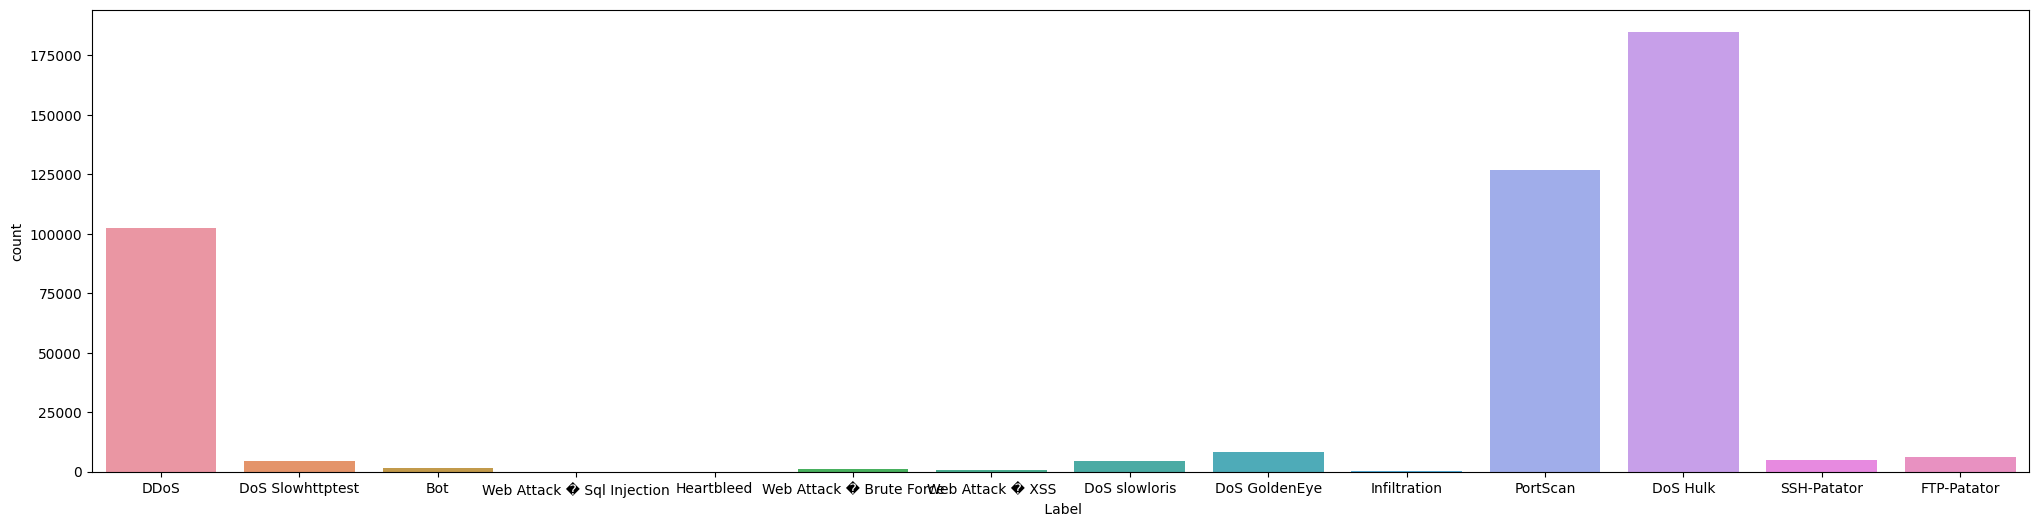

In [ ]:
# we cannot accurately recognize the 3 types of web attacks and Infiltration!
# how should we do?

# Infiltration: lack of samples?
# web attack: lack of samples? or looks similar to each other?

# try upsampling first
# increase the number of samples for Infiltration and web attacks
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ros = RandomOverSampler(sampling_strategy={'Infiltration': 400}, random_state=1)
X = df_malicious_train[df_malicious_train.columns[:-1]]
y = df_malicious_train[df_malicious_train.columns[-1]]
X_resampled, y_resampled = ros.fit_resample(X, y)

resampled_df_malicious_train = pd.DataFrame(columns = df_malicious_train.columns)

resampled_df_malicious_train[resampled_df_malicious_train.columns[:-1]] = X_resampled
resampled_df_malicious_train[resampled_df_malicious_train.columns[-1]] = y_resampled

# save into a csv file
# resampled_df.to_csv(folder_path + 'resampled_clean_traffic_data.csv', index = False)

fig = plt.figure(figsize=(25,6))
sns.countplot(x=' Label', data=resampled_df_malicious_train)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier

X_train = resampled_df_malicious_train[resampled_df_malicious_train.columns[:-1]]
y_train = resampled_df_malicious_train[resampled_df_malicious_train.columns[-1]]

X_test = df_malicious_test[df_malicious_test.columns[:-1]]
y_test = df_malicious_test[df_malicious_test.columns[-1]]

# training
rfc = RandomForestClassifier().fit(X_train, y_train)

# prediction
pred = rfc.predict(X_test)
acc = accuracy_score(pred, y_test)
print('Test Accuracy : {:.5f}'.format(acc))
print('Classification_report:')
print(classification_report(y_test, pred))


Test Accuracy : 0.99855
Classification_report:
                            precision    recall  f1-score   support

                       Bot       1.00      1.00      1.00       387
                      DDoS       1.00      1.00      1.00     25409
             DoS GoldenEye       1.00      1.00      1.00      2035
                  DoS Hulk       1.00      1.00      1.00     46132
          DoS Slowhttptest       1.00      0.99      1.00      1095
             DoS slowloris       0.99      1.00      0.99      1156
               FTP-Patator       1.00      1.00      1.00      1616
                Heartbleed       1.00      1.00      1.00         3
              Infiltration       1.00      0.86      0.92         7
                  PortScan       1.00      1.00      1.00     32045
               SSH-Patator       1.00      1.00      1.00      1171
  Web Attack � Brute Force       0.75      0.84      0.79       293
Web Attack � Sql Injection       1.00      0.50      0.67         6


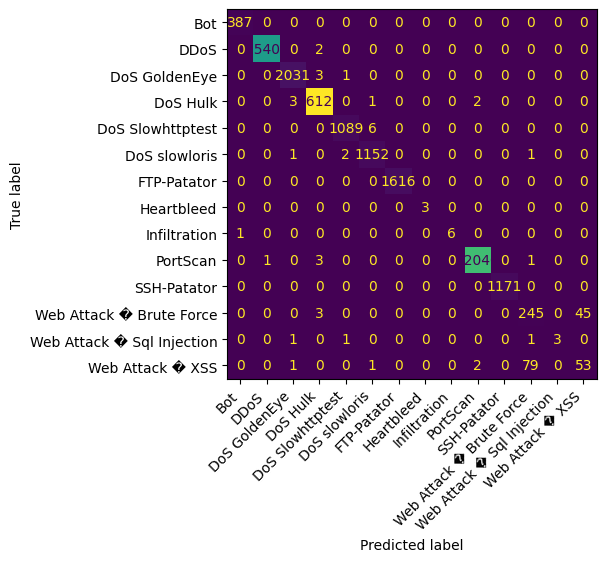

In [ ]:
# 400 oversampling
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot(colorbar=False)
plt.xticks(rotation=45, ha='right')
plt.show()

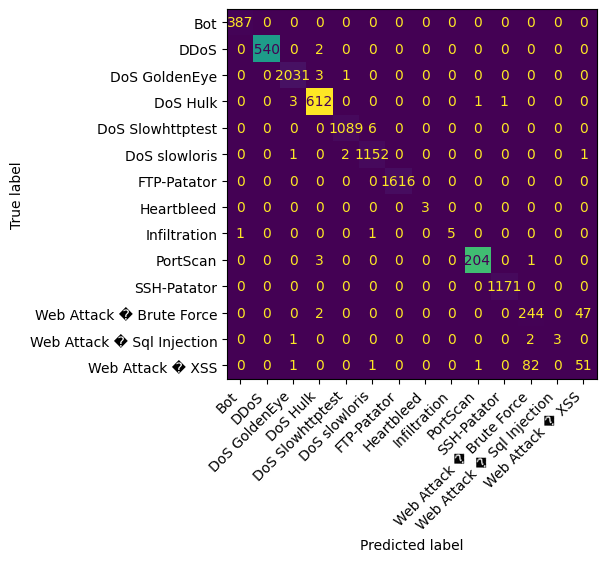

In [ ]:
# 200 oversampling
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot(colorbar=False)
plt.xticks(rotation=45, ha='right')
plt.show()

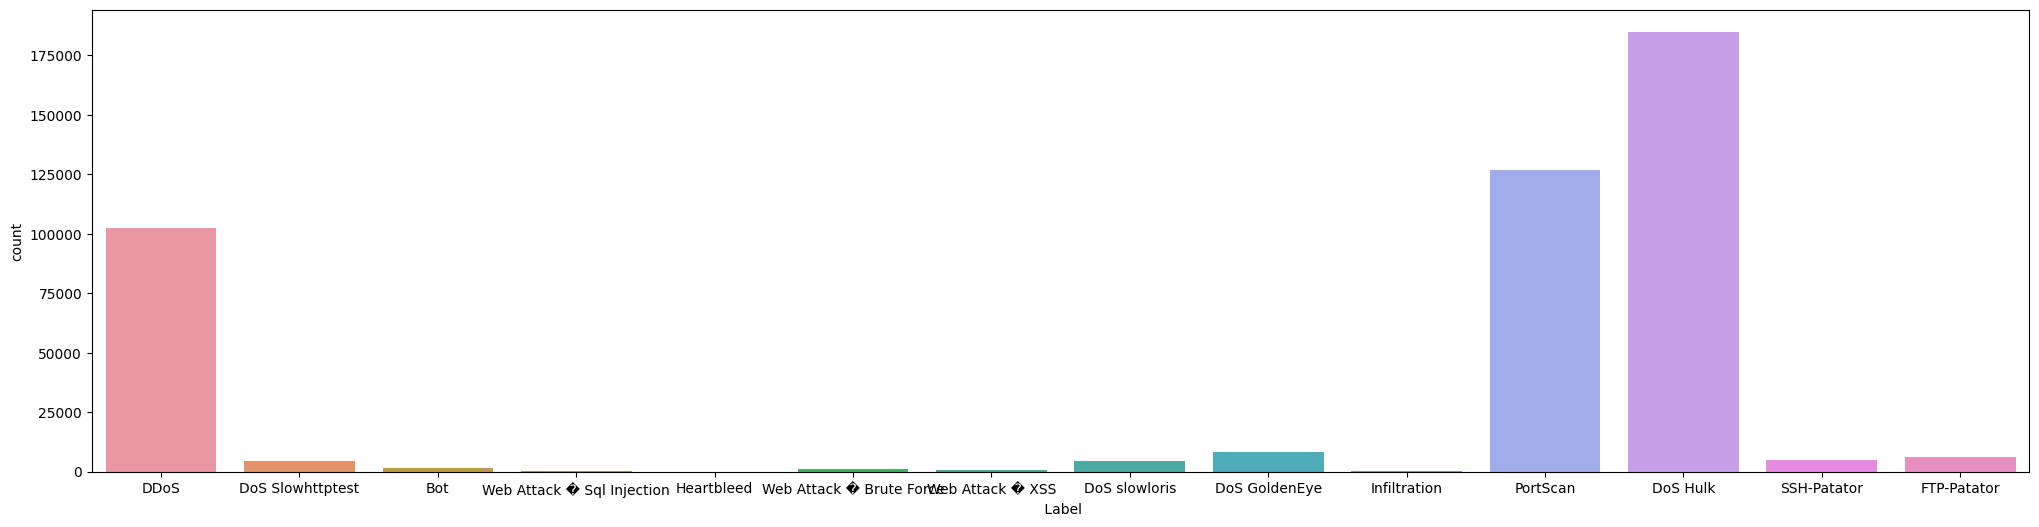

In [ ]:
# oversampling sql injection
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ros = RandomOverSampler(sampling_strategy={'Infiltration': 400, 'Web Attack � Sql Injection': 200}, random_state=1)
X = df_malicious_train[df_malicious_train.columns[:-1]]
y = df_malicious_train[df_malicious_train.columns[-1]]
X_resampled, y_resampled = ros.fit_resample(X, y)

resampled_df_malicious_train = pd.DataFrame(columns = df_malicious_train.columns)

resampled_df_malicious_train[resampled_df_malicious_train.columns[:-1]] = X_resampled
resampled_df_malicious_train[resampled_df_malicious_train.columns[-1]] = y_resampled

# save into a csv file
# resampled_df.to_csv(folder_path + 'resampled_clean_traffic_data.csv', index = False)

fig = plt.figure(figsize=(25,6))
sns.countplot(x=' Label', data=resampled_df_malicious_train)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier

X_train = resampled_df_malicious_train[resampled_df_malicious_train.columns[:-1]]
y_train = resampled_df_malicious_train[resampled_df_malicious_train.columns[-1]]

X_test = df_malicious_test[df_malicious_test.columns[:-1]]
y_test = df_malicious_test[df_malicious_test.columns[-1]]

# training
rfc = RandomForestClassifier().fit(X_train, y_train)

# prediction
pred = rfc.predict(X_test)
acc = accuracy_score(pred, y_test)
print('Test Accuracy : {:.5f}'.format(acc))
print('Classification_report:')
print(classification_report(y_test, pred))

Test Accuracy : 0.99846
Classification_report:
                            precision    recall  f1-score   support

                       Bot       1.00      1.00      1.00       387
                      DDoS       1.00      1.00      1.00     25409
             DoS GoldenEye       1.00      1.00      1.00      2035
                  DoS Hulk       1.00      1.00      1.00     46132
          DoS Slowhttptest       1.00      0.99      1.00      1095
             DoS slowloris       0.99      1.00      0.99      1156
               FTP-Patator       1.00      1.00      1.00      1616
                Heartbleed       1.00      1.00      1.00         3
              Infiltration       1.00      0.71      0.83         7
                  PortScan       1.00      1.00      1.00     32045
               SSH-Patator       1.00      1.00      1.00      1171
  Web Attack � Brute Force       0.73      0.82      0.77       293
Web Attack � Sql Injection       1.00      0.50      0.67         6


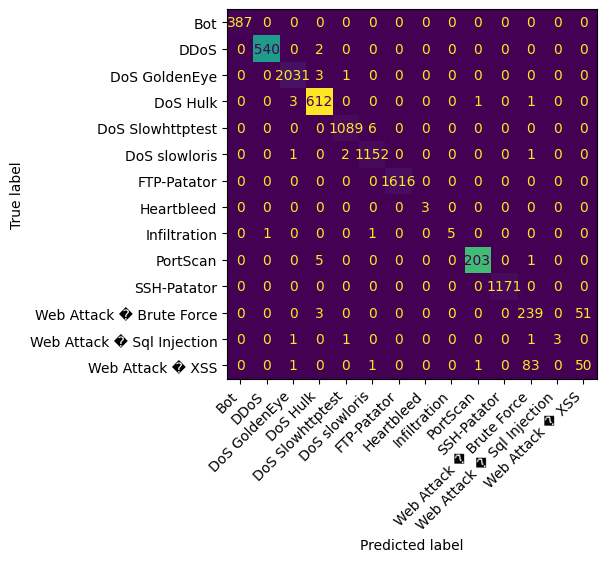

In [ ]:
# 400, 400 oversampling
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot(colorbar=False)
plt.xticks(rotation=45, ha='right')
plt.show()

## 3rd layer: merge web attacks

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# copy
df_3_train = df_malicious_train.copy()
df_3_test = df_malicious_test.copy()
# convert all web attack labels to "Web Attack":
df_3_train.loc[df_3_train[' Label'] == 'Web Attack � Brute Force', ' Label'] = 'Web Attack'
df_3_train.loc[df_3_train[' Label'] == 'Web Attack � Sql Injection', ' Label'] = 'Web Attack'
df_3_train.loc[df_3_train[' Label'] == 'Web Attack � XSS', ' Label'] = 'Web Attack'

df_3_test.loc[df_3_test[' Label'] == 'Web Attack � Brute Force', ' Label'] = 'Web Attack'
df_3_test.loc[df_3_test[' Label'] == 'Web Attack � Sql Injection', ' Label'] = 'Web Attack'
df_3_test.loc[df_3_test[' Label'] == 'Web Attack � XSS', ' Label'] = 'Web Attack'

fig = plt.figure(figsize=(25,6))
sns.countplot(x=' Label', data=df_3_train)
plt.show()

fig = plt.figure(figsize=(25,6))
sns.countplot(x=' Label', data=df_3_test)
plt.show()


In [ ]:
# training using random forest: if performance is not good, we will stop here as that is the best we can do
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier

X_train = df_3_train[df_3_train.columns[:-1]]
y_train = df_3_train[df_3_train.columns[-1]]

X_test = df_3_test[df_3_test.columns[:-1]]
y_test = df_3_test[df_3_test.columns[-1]]

# training
rfc = RandomForestClassifier().fit(X_train, y_train)

# prediction
pred = rfc.predict(X_test)
acc = accuracy_score(pred, y_test)
print('Test Accuracy : {:.5f}'.format(acc))
print('Classification_report:')
print(classification_report(y_test, pred))


cm = confusion_matrix(y_test, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot(colorbar=False)
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# extract web attacks only
df_web_train = df_malicious_train[df_malicious_train[' Label'] != 'BENIGN'].copy()
df_web_test = df_malicious_test[df_malicious_test[' Label'] != 'BENIGN'].copy()

#
fig = plt.figure(figsize=(25,6))
sns.countplot(x=' Label', data=df_web_train)
plt.show()

fig = plt.figure(figsize=(25,6))
sns.countplot(x=' Label', data=df_web_test)
plt.show()

In [ ]:
# training using random forest: if performance is not good, we will stop here as that is the best we can do
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier

X_train = df_web_train[df_web_train.columns[:-1]]
y_train = df_web_train[df_web_train.columns[-1]]

X_test = df_web_test[df_web_test.columns[:-1]]
y_test = df_web_test[df_web_test.columns[-1]]

# training
rfc = RandomForestClassifier().fit(X_train, y_train)

# prediction
pred = rfc.predict(X_test)
acc = accuracy_score(pred, y_test)
print('Test Accuracy : {:.5f}'.format(acc))
print('Classification_report:')
print(classification_report(y_test, pred))


cm = confusion_matrix(y_test, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot(colorbar=False)
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# try different models:
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
# training
abc = AdaBoostClassifier().fit(X_train, y_train)

# prediction
pred = abc.predict(X_test)
acc = accuracy_score(pred, y_test)
print('Test Accuracy : {:.5f}'.format(acc))
print('Classification_report:')
print(classification_report(y_test, pred))

In [ ]:
# training
etc = ExtraTreesClassifier().fit(X_train, y_train)

# prediction
pred = etc.predict(X_test)
acc = accuracy_score(pred, y_test)
print('Test Accuracy : {:.5f}'.format(acc))
print('Classification_report:')
print(classification_report(y_test, pred))

In [ ]:
# Linear Classification
from sklearn.linear_model import SGDClassifier

# training
sc = SGDClassifier().fit(X_train, y_train)

# prediction
pred = sc.predict(X_test)
acc = accuracy_score(pred, y_test)
print('Test Accuracy : {:.5f}'.format(acc))
print('Classification_report:')
print(classification_report(y_test, pred))

In [ ]:
from sklearn.naive_bayes import GaussianNB
# training
nb = GaussianNB().fit(X_train, y_train)

# prediction
pred = nb.predict(X_test)
acc = accuracy_score(pred, y_test)
print('Test Accuracy : {:.5f}'.format(acc))
print('Classification_report:')
print(classification_report(y_test, pred))

In [ ]:
from sklearn.neural_network import MLPClassifier
# training
mlp = MLPClassifier(hidden_layer_sizes=(40,), random_state=1, max_iter=300).fit(X_train, y_train)

# prediction
pred = mlp.predict(X_test)
acc = accuracy_score(pred, y_test)
print('Test Accuracy : {:.5f}'.format(acc))
print('Classification_report:')
print(classification_report(y_test, pred))